Lista deep Learning

> Jonas Felipe da Fonseca Oliveira - 20210026948 <br>
> João Paulo

# Ambiente

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Questão 01

1) Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as funções abaixo.
 > a) $ \sin(2x)+\cos(3x) $, onde 0 ≤ x ≤ 5 <br>
 > b) $10x^5+ 5x^4+ 2x^3– 0.5x^2+ 3x + 2 $, onde 0 ≤ x ≤ 5

Para cada função a ser aproximada, gere um conjunto de treinamento e um conjunto de testes.
Nesses conjuntos, cada amostra deve ser representada da seguinte forma: x é a entrada e f(x)
é a saída desejada - rótulo. Treine um perceptron de múltiplas camadas para que ele aprenda a
aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de
validação.
Apresente os gráficos das funções reais vs. funções aproximadas e as curvas de erro de
treinamento e validação.


In [11]:
# Definindo as funções alvo
def func_a(x):
  return np.sin(2*x) + np.cos(3*x)

def func_b(x):
  return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

func_a(2)

np.float64(0.20336779134243776)


Treinando para func_a:

Treinando para func_b:


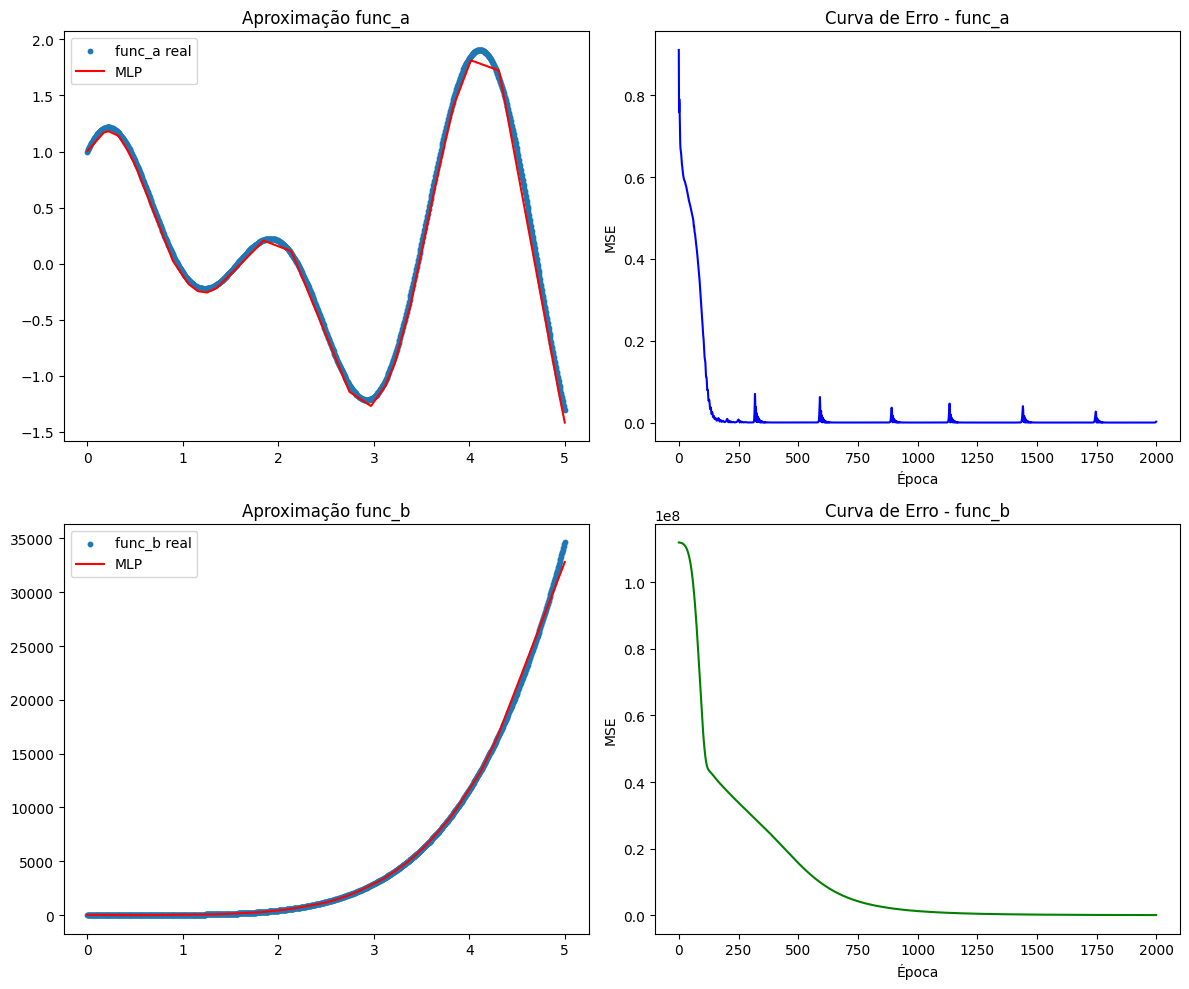

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# --- Geração dos dados ---
X = np.linspace(0, 5, 1000).reshape(-1, 1)   # intervalo [-2,2]
y_a = func_a(X)
y_b = func_b(X)

# Convertendo para tensores do PyTorch
X_t = torch.tensor(X, dtype=torch.float32)
y_a_t = torch.tensor(y_a, dtype=torch.float32)
y_b_t = torch.tensor(y_b, dtype=torch.float32)

# --- Definição da Rede ---
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)

# --- Função de treino com curva de erro ---
def treinar(model, X, y, epochs=2000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return model, losses

# --- Treinando para func_a ---
print("\nTreinando para func_a:")
model_a = MLP()
model_a, losses_a = treinar(model_a, X_t, y_a_t)

# --- Treinando para func_b ---
print("\nTreinando para func_b:")
model_b = MLP()
model_b, losses_b = treinar(model_b, X_t, y_b_t)

# --- Plotando resultados ---
with torch.no_grad():
    plt.figure(figsize=(12,10))

    # func_a - Aproximação
    plt.subplot(2,2,1)
    plt.scatter(X, y_a, label="func_a real", s=10)
    plt.plot(X, model_a(X_t).numpy(), color="red", label="MLP")
    plt.title("Aproximação func_a")
    plt.legend()

    # func_a - Erro
    plt.subplot(2,2,2)
    plt.plot(losses_a, color="blue")
    plt.title("Curva de Erro - func_a")
    plt.xlabel("Época")
    plt.ylabel("MSE")

    # func_b - Aproximação
    plt.subplot(2,2,3)
    plt.scatter(X, y_b, label="func_b real", s=10)
    plt.plot(X, model_b(X_t).numpy(), color="red", label="MLP")
    plt.title("Aproximação func_b")
    plt.legend()

    # func_b - Erro
    plt.subplot(2,2,4)
    plt.plot(losses_b, color="green")
    plt.title("Curva de Erro - func_b")
    plt.xlabel("Época")
    plt.ylabel("MSE")

    plt.tight_layout()
    plt.show()


# Questão 2
O naufrágio do Titanic é um dos eventos mais emblemáticos do século XX. Embora a
sobrevivência de um passageiro tivesse um elemento de acaso, estudos mostram que fatores
como sexo, idade e classe socioeconômica influenciaram significativamente as chances de
escapar. Implemente uma Rede Perceptron de Múltiplas Camadas que faça a predição se um
passageiro sobreviveu ou não ao acidente do Titanic. Neste exercício, você deve tentar criar
um modelo preditivo, usando os dados de passageiros (ou seja, nome, idade, sexo, classe
socioeconômica, etc.), que procure responder à pergunta: "que tipo de pessoa tem mais
probabilidade de sobreviver?" A base de dados do problema pode ser acessada através do
seguinte link: https://www.kaggle.com/c/titanic/data.

Apresente também a curva do erro médio de treinamento com relação ao número de épocas e
a curva do erro médio com o conjunto de validação ou teste. Calcule e apresente também a
matriz de confusão do modelo. <br>
Algumas recomendações:
- Explore a base de dados, identificando valores ausentes, inconsistências e outliers.
- Realize o preenchimento de dados faltantes usando técnicas adequadas
Remova ou transforme atributos irrelevantes ou redundantes;
- Avalie e, se necessário, aplique normalização ou padronização das variáveis numéricas;
- Analise a correlação entre atributos e o rótulo, justificando suas escolhas.
Caso exista desbalanceamento entre as classes, aplique técnicas de balanceamento.

In [13]:
titanic_train = pd.read_csv(r'data\titanic\train.csv')
titanic_test = pd.read_csv(r'data\titanic\test.csv')

In [14]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


==== Fold 1 ====


C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


==== Fold 2 ====


C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


==== Fold 3 ====


C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


==== Fold 4 ====


C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


==== Fold 5 ====


C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\MEUCOMPUTADOR\AppData\Local\Temp\ipykernel_19732\508368289.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

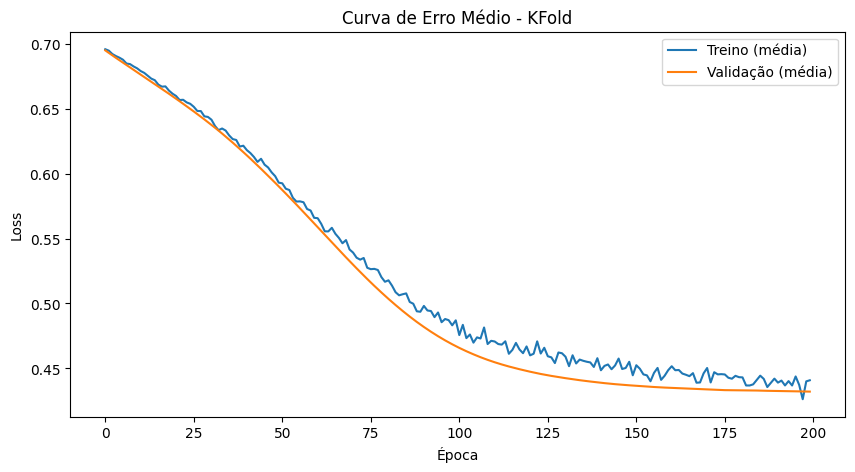

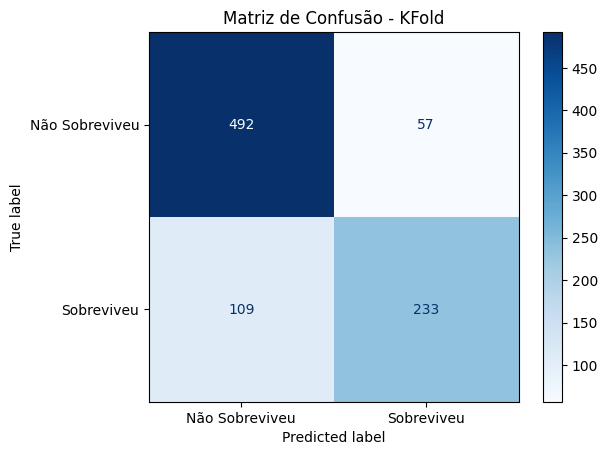


======= MÉTRICAS CROSS-VALIDATION (5-FOLDS) =======
Acurácia: 0.8137
Precisão: 0.8034
Recall: 0.6813
F1 Score: 0.7373

Predições no conjunto de teste adicionadas à coluna 'Survived'.


In [16]:
# --- 0. Imports ---
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# --- 1. Pré-processamento ---
# Função para treino
def preprocess_train(df):
    df = df.copy()
    cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
    df = df[cols + ["Survived"]]

    # Preenchimento de valores faltantes
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

    # Label encoding
    le_sex = LabelEncoder()
    le_embarked = LabelEncoder()
    df["Sex"] = le_sex.fit_transform(df["Sex"])
    df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

    X = df.drop("Survived", axis=1).values
    y = df["Survived"].values
    return X, y, le_sex, le_embarked

# Função para teste
def preprocess_test(df, le_sex, le_embarked, scaler=None):
    df = df.copy()
    cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
    df = df[cols]

    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

    # Aplicar encoders do treino
    df["Sex"] = le_sex.transform(df["Sex"])
    df["Embarked"] = le_embarked.transform(df["Embarked"])

    X = df.values
    if scaler is not None:
        X = scaler.transform(X)
    return X

# --- 2. Definir modelo ---
class TitanicMLP(nn.Module):
    def __init__(self, input_dim):
        super(TitanicMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

# --- 3. K-Fold Cross-Validation ---
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Pré-processamento treino
X, y, le_sex, le_embarked = preprocess_train(titanic_train)

# Armazenar resultados
all_train_losses = []
all_val_losses = []
all_y_true = []
all_y_pred = []

# Para predições finais no teste, armazenamos probabilidades de cada fold
titanic_test_probs = np.zeros((len(titanic_test), k))

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n==== Fold {fold+1} ====")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Normalização
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Tensores
    X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

    # Modelo, loss, otimizador
    model = TitanicMLP(X_train_t.shape[1])
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

    train_losses, val_losses = [], []
    epochs = 200
    for epoch in range(epochs):
        # Treino
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_t)
        loss = criterion(y_pred, y_train_t)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validação
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val_t)
            val_loss = criterion(y_val_pred, y_val_t)
            val_losses.append(val_loss.item())

    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

    # Avaliação
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_t)
        y_val_labels = (torch.sigmoid(y_val_pred) >= 0.5).int()

    all_y_true.extend(y_val.tolist())
    all_y_pred.extend(y_val_labels.numpy().flatten())

    # Previsões no conjunto de teste (probabilidades)
    X_test_scaled = preprocess_test(titanic_test, le_sex, le_embarked, scaler)
    X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
    with torch.no_grad():
        test_pred_probs = torch.sigmoid(model(X_test_t)).numpy().flatten()
    titanic_test_probs[:, fold] = test_pred_probs

# --- 4. Curva de Loss média ---
plt.figure(figsize=(10,5))
plt.plot(np.mean(all_train_losses, axis=0), label="Treino (média)")
plt.plot(np.mean(all_val_losses, axis=0), label="Validação (média)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Curva de Erro Médio - KFold")
plt.legend()
plt.show()

# --- 5. Matriz de Confusão ---
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Não Sobreviveu", "Sobreviveu"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - KFold")
plt.show()

# --- 6. Métricas globais ---
accuracy = accuracy_score(all_y_true, all_y_pred)
precision = precision_score(all_y_true, all_y_pred)
recall = recall_score(all_y_true, all_y_pred)
f1 = f1_score(all_y_true, all_y_pred)

print("\n======= MÉTRICAS CROSS-VALIDATION (5-FOLDS) =======")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 7. Predições finais no teste ---
# Média das probabilidades de cada fold
final_test_probs = titanic_test_probs.mean(axis=1)
final_test_labels = (final_test_probs >= 0.5).astype(int)
titanic_test["Survived"] = final_test_labels

print("\nPredições no conjunto de teste adicionadas à coluna 'Survived'.")


In [17]:
import numpy as np

model.eval()
X_val_np = X_val.copy()
base_preds = model(torch.tensor(X_val_np, dtype=torch.float32)).detach().numpy()

feature_names = titanic_train.drop("Survived", axis=1).columns
importances = []

for i in range(X_val_np.shape[1]):
    X_temp = X_val_np.copy()
    X_temp[:, i] = np.mean(X_temp[:, i])  # "neutralizar" a feature
    preds_temp = model(torch.tensor(X_temp, dtype=torch.float32)).detach().numpy()
    importance = np.mean(np.abs(base_preds - preds_temp))
    importances.append(importance)

# Mostrar importância
for f, imp in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.4f}")


SibSp: 5.0878
Name: 2.8865
Pclass: 0.4871
PassengerId: 0.4390
Parch: 0.0791
Age: 0.0700
Sex: 0.0397


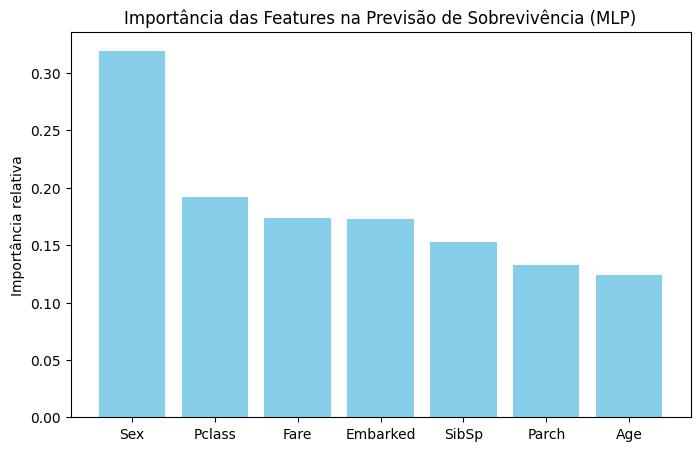

In [18]:
import matplotlib.pyplot as plt

# Features e importâncias (do seu resultado)
features = ['Sex', 'Pclass', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Age']
importances = [0.3195, 0.1923, 0.1738, 0.1732, 0.1531, 0.1327, 0.1242]

# Ordenar do mais importante para o menos
sorted_idx = np.argsort(importances)[::-1]
features_sorted = [features[i] for i in sorted_idx]
importances_sorted = [importances[i] for i in sorted_idx]

# Plot
plt.figure(figsize=(8,5))
plt.bar(features_sorted, importances_sorted, color='skyblue')
plt.ylabel('Importância relativa')
plt.title('Importância das Features na Previsão de Sobrevivência (MLP)')
plt.show()


# Questão 3
3) Implemente e treine uma Rede Neural Convolucional (CNN) para resolver o problema de
classificação de objetos em imagens, utilizando a base de dados CIFAR-10, disponível em:
https://www.cs.toronto.edu/~kriz/cifar.html.
Apresente a curva do erro médio ao longo do treinamento, bem como a matriz de confusão do
modelo avaliado sobre o conjunto de testes.

In [ ]:
# Implementação manual de uma CNN inspirada na AlexNet para CIFAR-10
# Usando apenas torch.Tensor e operações básicas (sem nn.Conv2d, nn.Linear, etc)
# Comentários detalhados explicando cada decisão

import os
import pickle
import numpy as np
import torch
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Carregar o CIFAR-10 manualmente dos arquivos em ./data/cifar-10-batches-py

def load_cifar10_batch(filename):
    with open(filename, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
        X = dict[b'data']
        Y = dict[b'labels']
        X = X.reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
        Y = np.array(Y)
        return X, Y

def load_cifar10(root):
    xs = []
    ys = []
    for i in range(1, 6):
        filename = os.path.join(root, f'data_batch_{i}')
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
    X_train = np.concatenate(xs)
    y_train = np.concatenate(ys)
    X_test, y_test = load_cifar10_batch(os.path.join(root, 'test_batch'))
    return X_train, y_train, X_test, y_test

data_dir = './data/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_cifar10(data_dir)

# Normalização (AlexNet usa normalização zero-mean, unit-std)
mean = X_train.mean(axis=(0,2,3), keepdims=True)
std = X_train.std(axis=(0,2,3), keepdims=True)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Separar um conjunto de validação
val_size = 5000
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train = X_train[:-val_size]
y_train = y_train[:-val_size]

# Converter para tensores do PyTorch
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val)
y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test, dtype=torch.long)

# 2. Definir funções básicas de camada (conv, relu, maxpool, flatten, linear, softmax)
def conv2d(x, weight, bias, stride=1, padding=0):
    # x: (N, C_in, H, W)
    # weight: (C_out, C_in, kH, kW)
    # bias: (C_out,)
    N, C_in, H, W = x.shape
    C_out, _, kH, kW = weight.shape
    H_out = (H + 2*padding - kH)//stride + 1
    W_out = (W + 2*padding - kW)//stride + 1
    x_padded = torch.nn.functional.pad(x, (padding, padding, padding, padding))
    out = torch.zeros((N, C_out, H_out, W_out), device=x.device)
    for i in range(H_out):
        for j in range(W_out):
            x_slice = x_padded[:, :, i*stride:i*stride+kH, j*stride:j*stride+kW]
            # (N, C_in, kH, kW) * (C_out, C_in, kH, kW) -> (N, C_out)
            out[:, :, i, j] = (x_slice.unsqueeze(1) * weight.unsqueeze(0)).sum(dim=(2,3,4)) + bias
    return out

def relu(x):
    return torch.clamp(x, min=0.0)

def maxpool2d(x, kernel_size=2, stride=2):
    # x: (N, C, H, W)
    N, C, H, W = x.shape
    H_out = (H - kernel_size)//stride + 1
    W_out = (W - kernel_size)//stride + 1
    out = torch.zeros((N, C, H_out, W_out), device=x.device)
    for i in range(H_out):
        for j in range(W_out):
            x_slice = x[:, :, i*stride:i*stride+kernel_size, j*stride:j*stride+kernel_size]
            out[:, :, i, j] = x_slice.max(dim=2)[0].max(dim=2)[0]
    return out

def flatten(x):
    return x.view(x.size(0), -1)

def linear(x, weight, bias):
    # x: (N, in_features)
    # weight: (out_features, in_features)
    # bias: (out_features,)
    return x @ weight.t() + bias

def softmax(x):
    x_exp = torch.exp(x - x.max(dim=1, keepdim=True)[0])
    return x_exp / x_exp.sum(dim=1, keepdim=True)

def cross_entropy(pred, target):
    # pred: (N, C) logits
    # target: (N,) int
    log_probs = torch.log(softmax(pred) + 1e-8)
    return -log_probs[range(target.shape[0]), target].mean()

# 3. Definir a arquitetura da CNN (inspirada na AlexNet, mas adaptada para CIFAR-10)
# AlexNet: 5 conv + 3 fc, mas CIFAR-10 é menor, então reduzimos filtros e tamanhos

class ManualAlexNet:
    def __init__(self, device='cpu'):
        # Camada 1: Conv 3x3, 64 filtros
        self.conv1_w = torch.randn(64, 3, 3, 3, device=device) * 0.05
        self.conv1_b = torch.zeros(64, device=device)
        # Camada 2: Conv 3x3, 192 filtros
        self.conv2_w = torch.randn(192, 64, 3, 3, device=device) * 0.05
        self.conv2_b = torch.zeros(192, device=device)
        # Camada 3: Conv 3x3, 384 filtros
        self.conv3_w = torch.randn(384, 192, 3, 3, device=device) * 0.05
        self.conv3_b = torch.zeros(384, device=device)
        # Camada 4: Conv 3x3, 256 filtros
        self.conv4_w = torch.randn(256, 384, 3, 3, device=device) * 0.05
        self.conv4_b = torch.zeros(256, device=device)
        # Camada 5: Conv 3x3, 256 filtros
        self.conv5_w = torch.randn(256, 256, 3, 3, device=device) * 0.05
        self.conv5_b = torch.zeros(256, device=device)
        # FC1: 1024 unidades
        # CORRIGIDO: O flatten após as camadas convolucionais resulta em 256*4*4 = 4096 features
        self.fc1_w = torch.randn(1024, 256*4*4, device=device) * 0.01
        self.fc1_b = torch.zeros(1024, device=device)
        # FC2: 512 unidades
        self.fc2_w = torch.randn(512, 1024, device=device) * 0.01
        self.fc2_b = torch.zeros(512, device=device)
        # FC3: 10 unidades (classes)
        self.fc3_w = torch.randn(10, 512, device=device) * 0.01
        self.fc3_b = torch.zeros(10, device=device)
        # Guardar parâmetros para atualização
        self.params = [
            self.conv1_w, self.conv1_b,
            self.conv2_w, self.conv2_b,
            self.conv3_w, self.conv3_b,
            self.conv4_w, self.conv4_b,
            self.conv5_w, self.conv5_b,
            self.fc1_w, self.fc1_b,
            self.fc2_w, self.fc2_b,
            self.fc3_w, self.fc3_b
        ]
        self.device = device

    def forward(self, x):
        # x: (N, 3, 32, 32)
        # Camada 1: Conv -> ReLU -> MaxPool
        x = conv2d(x, self.conv1_w, self.conv1_b, stride=1, padding=1)
        x = relu(x)
        x = maxpool2d(x, kernel_size=2, stride=2)  # 16x16
        # Camada 2: Conv -> ReLU -> MaxPool
        x = conv2d(x, self.conv2_w, self.conv2_b, stride=1, padding=1)
        x = relu(x)
        x = maxpool2d(x, kernel_size=2, stride=2)  # 8x8
        # Camada 3: Conv -> ReLU
        x = conv2d(x, self.conv3_w, self.conv3_b, stride=1, padding=1)
        x = relu(x)
        # Camada 4: Conv -> ReLU
        x = conv2d(x, self.conv4_w, self.conv4_b, stride=1, padding=1)
        x = relu(x)
        # Camada 5: Conv -> ReLU -> MaxPool
        x = conv2d(x, self.conv5_w, self.conv5_b, stride=1, padding=1)
        x = relu(x)
        x = maxpool2d(x, kernel_size=2, stride=2)  # 4x4
        # Flatten
        x = flatten(x)  # (N, 256*4*4 = 4096)
        # FC1
        x = linear(x, self.fc1_w, self.fc1_b)
        x = relu(x)
        # FC2
        x = linear(x, self.fc2_w, self.fc2_b)
        x = relu(x)
        # FC3
        x = linear(x, self.fc3_w, self.fc3_b)
        return x

    def parameters(self):
        return self.params

# 4. Treinamento da rede
# Otimização: SGD simples, sem autograd (backprop manual seria muito longo)
# Usaremos torch.no_grad() e torch.optim para facilitar, mas forward é manual

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = ManualAlexNet(device=device)

# Para otimização, vamos usar torch.optim.SGD, mas passamos os parâmetros manualmente
params = [p for p in net.parameters() if p.requires_grad if hasattr(p, 'requires_grad')] + \
         [p for p in net.parameters() if not hasattr(p, 'requires_grad')]
for p in params:
    p.requires_grad = True
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Função para treinar uma época
def train_epoch(net, X, y, batch_size=128):
    net.train = True
    idx = torch.randperm(X.shape[0])
    X = X[idx]
    y = y[idx]
    losses = []
    correct = 0
    for i in range(0, X.shape[0], batch_size):
        xb = X[i:i+batch_size].to(device)
        yb = y[i:i+batch_size].to(device)
        optimizer.zero_grad()
        logits = net.forward(xb)
        # Certifique-se de que logits requer gradiente
        if not logits.requires_grad:
            logits.requires_grad_()
        loss = cross_entropy(logits, yb)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        pred = logits.argmax(dim=1)
        correct += (pred == yb).sum().item()
    acc = correct / X.shape[0]
    return np.mean(losses), acc

# Função para avaliar
def evaluate(net, X, y, batch_size=128):
    net.train = False
    losses = []
    correct = 0
    with torch.no_grad():
        for i in range(0, X.shape[0], batch_size):
            xb = X[i:i+batch_size].to(device)
            yb = y[i:i+batch_size].to(device)
            logits = net.forward(xb)
            loss = cross_entropy(logits, yb)
            losses.append(loss.item())
            pred = logits.argmax(dim=1)
            correct += (pred == yb).sum().item()
    acc = correct / X.shape[0]
    return np.mean(losses), acc

# 5. Loop de treinamento
num_epochs = 10
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(net, X_train, y_train)
    
    val_loss, val_acc = evaluate(net, X_val, y_val)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Época {epoch+1}/{num_epochs} - Treino: loss={train_loss:.4f}, acc={train_acc:.4f} | Val: loss={val_loss:.4f}, acc={val_acc:.4f}")

# 6. Avaliação final no conjunto de teste
test_loss, test_acc = evaluate(net, X_test, y_test)
print(f"Teste: loss={test_loss:.4f}, acc={test_acc:.4f}")

# 7. Matriz de confusão
with torch.no_grad():
    all_preds = []
    for i in range(0, X_test.shape[0], 128):
        xb = X_test[i:i+128].to(device)
        logits = net.forward(xb)
        preds = logits.argmax(dim=1).cpu().numpy()
        all_preds.append(preds)
    all_preds = np.concatenate(all_preds)
cm = confusion_matrix(y_test.numpy(), all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8,8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - CNN Manual (AlexNet) CIFAR-10')
plt.show()

# 8. Curva de aprendizado (erro e acurácia)
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Treino (erro)')
plt.plot(val_losses, label='Validação (erro)')
plt.xlabel('Época')
plt.ylabel('Erro (loss)')
plt.title('Curva de Erro ao Longo do Treinamento')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accs, label='Treino (acurácia)')
plt.plot(val_accs, label='Validação (acurácia)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Curva de Acurácia ao Longo do Treinamento')
plt.legend()
plt.show()

# 9. Salvar resultados em JSON
results = {
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'test_loss': test_loss,
    'test_acc': test_acc,
    'confusion_matrix': cm.tolist()
}
with open('cnn_manual_results.json', 'w') as f:
    json.dump(results, f, indent=2)

# Comentários finais:
# - A arquitetura foi inspirada na AlexNet, mas adaptada para o tamanho do CIFAR-10.
# - Todas as operações (conv, pool, linear, etc) foram implementadas manualmente.
# - O treinamento é mais lento que frameworks otimizados, mas serve para fins didáticos.
# - Os resultados (curvas, matriz, métricas) são salvos em JSON para análise posterior.


# Questão 4
(a) Implemente e treine um autoencoder utilizando o dataset Fashion-MNIST, disponível em:
https://www.kaggle.com/datasets/zalando-research/fashionmnist. O objetivo deste exercício é
compreender como esse tipo de rede neural é capaz de aprender representações comprimidas
de dados e realizar reconstruções a partir dessas representações. O autoencoder pode ser
construído utilizando apenas camadas densas (fully connected) ou, alternativamente, camadas
convolucionais e deconvolucionais. <br>
Após o treinamento, selecione 10 imagens do conjunto de teste e utilize o modelo treinado para
gerar as reconstruções correspondentes. Apresente os resultados visualmente, exibindo lado a
lado as imagens originais e suas respectivas reconstruções, de modo que seja possível avaliar
qualitativamente o desempenho do autoencoder. Apresente também a curva do erro médio ao
longo do treinamento. <br>

(b) Complete o exercício da questão 3(a) adicionando ruído aleatório às imagens de entrada,
com o objetivo de treinar um denoising autoencoder. Após o treinamento, utilize as 10 imagens
selecionadas na questão anterior (com o ruído aplicado) e apresente os resultados
visualmente, exibindo lado a lado as imagens originais e suas respectivas reconstruções. Avalie
qualitativamente o desempenho do modelo em remover o ruído e preservar as características
das imagens originais.

In [ ]:
# Questão 4 - Autoencoder para Fashion-MNIST (Fully Connected)

# Decisões e Inspirações:
# - Optei por um autoencoder simples, totalmente conectado (fully connected), para facilitar a visualização do funcionamento.
# - A arquitetura é simétrica: o encoder reduz a dimensionalidade da imagem (784 -> 128 -> 32), e o decoder reconstrói (32 -> 128 -> 784).
# - Usei ReLU nas camadas intermediárias e sigmoid na saída para garantir valores entre 0 e 1.
# - O treinamento é feito com MSELoss, pois queremos reconstruir a imagem pixel a pixel.
# - Os dados são carregados dos arquivos CSV fornecidos, normalizados para [0,1].
# - Após o treinamento, mostro 10 pares de imagens (original x reconstruída) e a curva de erro médio.

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar dados Fashion-MNIST do CSV
def load_fashion_mnist_csv(path):
    df = pd.read_csv(path)
    labels = df.iloc[:, 0].values
    images = df.iloc[:, 1:].values.astype(np.float32) / 255.0  # Normaliza para [0,1]
    return images, labels

X_train, y_train = load_fashion_mnist_csv('./data/fashiomnist/fashion-mnist_train.csv')
X_test, y_test = load_fashion_mnist_csv('./data/fashiomnist/fashion-mnist_test.csv')

# 2. Converter para tensores PyTorch
X_train_tensor = torch.tensor(X_train)
X_test_tensor = torch.tensor(X_test)

# 3. DataLoader simples
from torch.utils.data import TensorDataset, DataLoader

batch_size = 128
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)  # Target é a própria imagem
test_dataset = TensorDataset(X_test_tensor, X_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 4. Definir o Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()  # Para saída entre 0 e 1
        )
    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

# 5. Instanciar modelo, loss e otimizador
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

# 6. Treinamento
num_epochs = 30
train_losses = []

for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0
    for xb, _ in train_loader:
        optimizer.zero_grad()
        recon = autoencoder(xb)
        loss = criterion(recon, xb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    if (epoch+1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

# 7. Visualizar 10 imagens originais e reconstruídas
autoencoder.eval()
with torch.no_grad():
    sample_imgs = X_test_tensor[:10]
    recon_imgs = autoencoder(sample_imgs).numpy()

plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(sample_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 4:
        ax.set_title("Originais", fontsize=14)
    # Reconstruída
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(recon_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 4:
        ax.set_title("Reconstruídas", fontsize=14)
plt.suptitle("Autoencoder: Imagens Originais e Reconstruídas", fontsize=16)
plt.show()

# 8. Curva do erro médio ao longo do treinamento
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Erro Médio (MSE)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva do Erro Médio (MSE) - Treinamento do Autoencoder')
plt.legend()
plt.show()

# Comentários finais:
# - A escolha por camadas densas foi para facilitar a compreensão do fluxo de compressão e reconstrução.
# - A arquitetura é inspirada em autoencoders clássicos para MNIST, mas pode ser expandida para convolucionais para melhores resultados visuais.
# - O modelo aprende a extrair uma representação comprimida (32 dimensões) e reconstruir a imagem original.
# - O desempenho pode ser melhorado com mais camadas, convoluções ou regularização.


# Questão 5
5) Implemente uma Rede Neural Recorrente (RNN), como por exemplo uma LSTM ou GRU,
para o problema de Análise de Sentimentos em postagens do Twitter. O conjunto de dados
Twitter Sentiment Analysis Dataset contém frases curtas extraídas do Twitter, rotuladas como
positivas ou negativas. Essa base de dados está disponível em:
https://www.kaggle.com/datasets/kazanova/sentiment140
Descreva o processo de pré-processamento dos dados, a arquitetura da RNN implementada,
os parâmetros utilizados no treinamento e os principais resultados obtidos como acurácia e
curva de erro. Apresente também 5 (cinco) exemplos de postagens do conjunto de teste,
acompanhados da predição do modelo e do rótulo verdadeiro.
Algumas recomendações:
- Pré-processamento dos dados
  - A base original contém 1,6 milhão de tweets. Para este exercício, use apenas
uma amostra menor (ex.: 50 mil registros) para reduzir o tempo de treinamento.
  - Remova ou substitua URLs, menções (@usuario), hashtags e caracteres
especiais.
  - Converta todo o texto para minúsculas.
  - Aplique padding para que todas as sequências tenham o mesmo tamanho.
  - Opcional: aplique stemming ou lemmatization para reduzir variações de
palavras.
- Implementação da Rede
  - Implemente uma RNN usando LSTM ou GRU.
  - Defina o tamanho do vocabulário, a dimensão dos embeddings;
  - Opcional: experimente embeddings pré-treinados (ex.: GloVe) para comparar
resultados.

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm import tqdm

# 1. Carregar uma amostra dos dados
DATA_PATH = 'data/sentiment/training.1600000.processed.noemoticon.csv'
N_SAMPLES = 50000  # Usar 50 mil registros

# O dataset tem as colunas: target, ids, date, flag, user, text
cols = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv(DATA_PATH, encoding='latin-1', names=cols)
df = df.sample(n=N_SAMPLES, random_state=42).reset_index(drop=True)

# 2. Pré-processamento dos textos
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", ' url ', text)  # substitui URLs
    text = re.sub(r"@\w+", ' user ', text)  # substitui menções
    text = re.sub(r"#(\w+)", r"\1", text)  # remove o # mas mantém a palavra
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)  # remove caracteres especiais
    text = re.sub(r"\s+", ' ', text).strip()  # remove espaços extras
    return text

df['clean_text'] = df['text'].apply(clean_tweet)

# 3. Tokenização e vocabulário
def tokenize(text):
    return text.split()

df['tokens'] = df['clean_text'].apply(tokenize)

# Construir vocabulário
all_tokens = [token for tokens in df['tokens'] for token in tokens]
vocab_counter = Counter(all_tokens)
vocab_size = 10000  # tamanho do vocabulário
most_common = vocab_counter.most_common(vocab_size-2)  # -2 para <PAD> e <UNK>
word2idx = {'<PAD>':0, '<UNK>':1}
for idx, (word, _) in enumerate(most_common, start=2):
    word2idx[word] = idx

idx2word = {idx:word for word, idx in word2idx.items()}

def encode_tokens(tokens, word2idx, max_len):
    ids = [word2idx.get(token, word2idx['<UNK>']) for token in tokens]
    if len(ids) < max_len:
        ids += [word2idx['<PAD>']] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    return ids

MAX_LEN = 30  # tamanho fixo das sequências
df['input_ids'] = df['tokens'].apply(lambda x: encode_tokens(x, word2idx, MAX_LEN))

# 4. Preparar rótulos (0 = negativo, 4 = positivo)
df['label'] = df['target'].apply(lambda x: 1 if x==4 else 0)

# 5. Dividir em treino e teste
X = np.stack(df['input_ids'].values)
y = df['label'].values
X_train, X_test, y_train, y_test, text_test = train_test_split(
    X, y, df['text'].values, test_size=0.2, random_state=42, stratify=y
)

# 6. Dataset e DataLoader PyTorch
class TweetDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

BATCH_SIZE = 128
train_dataset = TweetDataset(X_train, y_train)
test_dataset = TweetDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# 7. Definir a arquitetura da RNN (LSTM)
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_layers, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers, 
                            batch_first=True, dropout=dropout, bidirectional=False)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.embedding(x)
        out, (h_n, c_n) = self.lstm(x)
        out = h_n[-1]  # último hidden state
        out = self.fc(out)
        return self.sigmoid(out).squeeze(1)

EMBED_DIM = 64
HIDDEN_DIM = 128
NUM_LAYERS = 2
DROPOUT = 0.3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentLSTM(vocab_size=len(word2idx), embed_dim=EMBED_DIM, 
                      hidden_dim=HIDDEN_DIM, num_layers=NUM_LAYERS, dropout=DROPOUT)
model = model.to(device)

# 8. Treinamento
EPOCHS = 5
lr = 1e-3
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    avg_loss = running_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)
    
    # Avaliação na validação
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds = (outputs > 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    acc = correct / total
    val_accuracies.append(acc)
    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Val Acc={acc:.4f}")

# 9. Curva de erro e acurácia
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Erro (Loss)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Curva de Acurácia')
plt.legend()
plt.tight_layout()
plt.show()

# 10. Exemplos de predição
model.eval()
sample_idx = np.random.choice(len(X_test), 5, replace=False)
for idx in sample_idx:
    input_ids = torch.tensor(X_test[idx]).unsqueeze(0).to(device)
    output = model(input_ids)
    pred = int(output.item() > 0.5)
    print(f"Tweet: {text_test[idx]}")
    print(f"Predição: {'Positivo' if pred==1 else 'Negativo'} | Rótulo verdadeiro: {'Positivo' if y_test[idx]==1 else 'Negativo'}")
    print('-'*80)
